<a href="https://colab.research.google.com/github/shreyapurwar03/Codsoft-Data-Science-Intern/blob/main/Titanic_Survival_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.tail(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Tail is used to display the last 7 rows

In [ ]:
survived_df=df[df['Survived']==1]
not_survived_df=df[df['Survived']==0]
print('Total Passengers='+str(len(df)))
print('Number of Survived Passengers=',len(survived_df))
print('Number of Passengers who did not survive=',len(not_survived_df))
print('Percentage Survived=',(len(survived_df)/len(df))*100,'%')


Total Passengers=418
Number of Survived Passengers= 152
Number of Passengers who did not survive= 266
Percentage Survived= 36.36363636363637 %


<Axes: xlabel='Pclass', ylabel='count'>

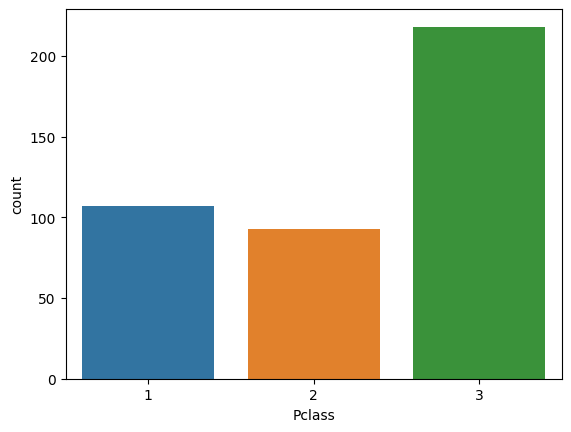

In [ ]:
sns.countplot(x='Pclass',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

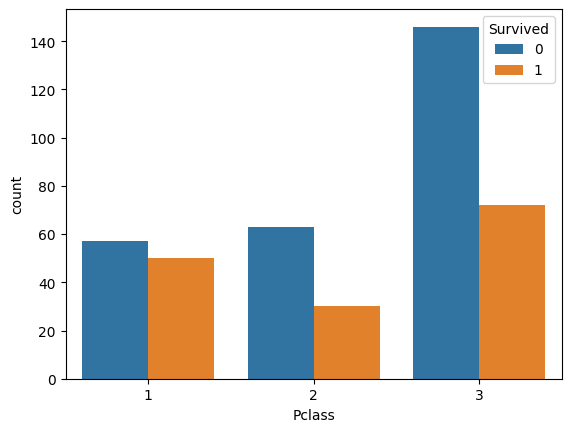

In [ ]:
sns.countplot(x='Pclass',hue='Survived',data=df)

<Axes: xlabel='SibSp', ylabel='count'>

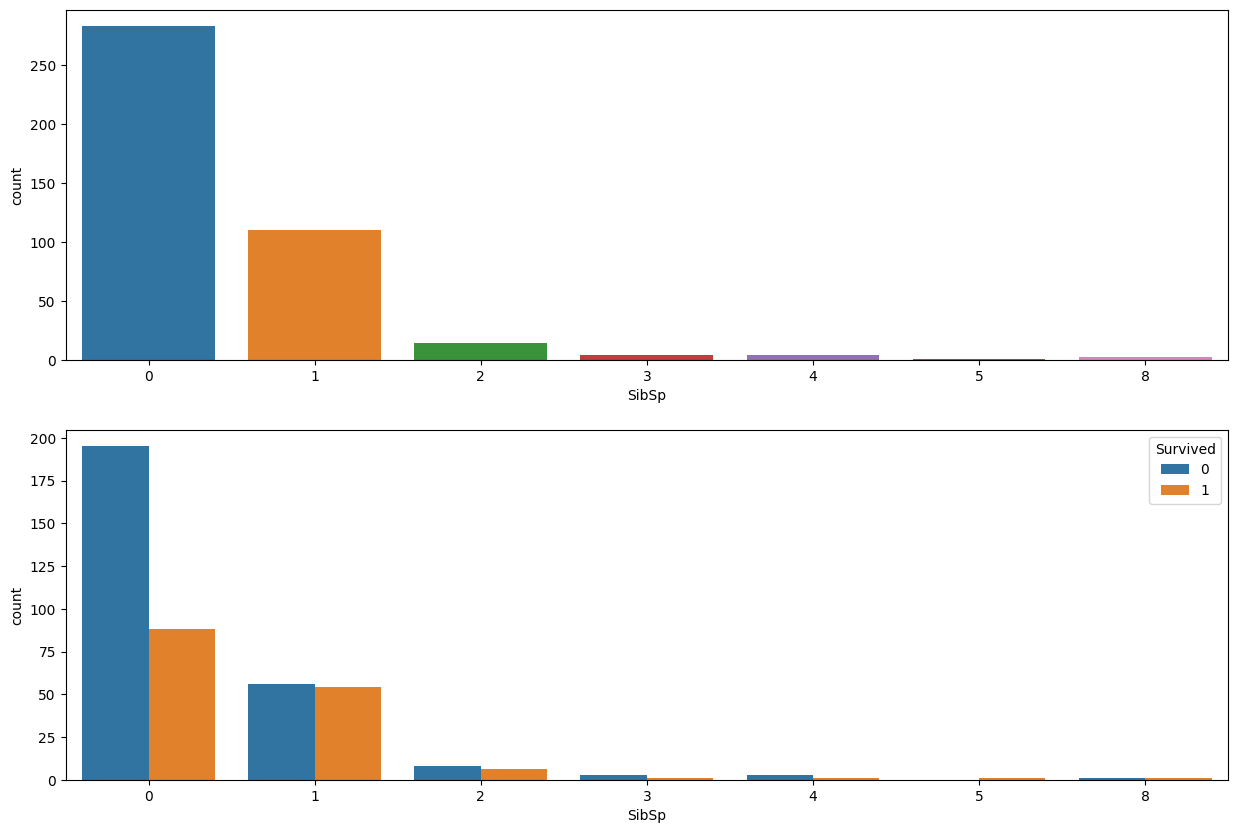

In [ ]:
plt.figure(figsize=[15,10])
plt.subplot(211)
sns.countplot(x='SibSp',data=df)
plt.subplot(212)
sns.countplot(x='SibSp',hue='Survived',data=df)

Maximum people who were travelling were single i.e without sibling or spouse
Most people who died were also singles. People with 1 sibling/spouse had 50-50 chance of survival


<Axes: xlabel='Parch', ylabel='count'>

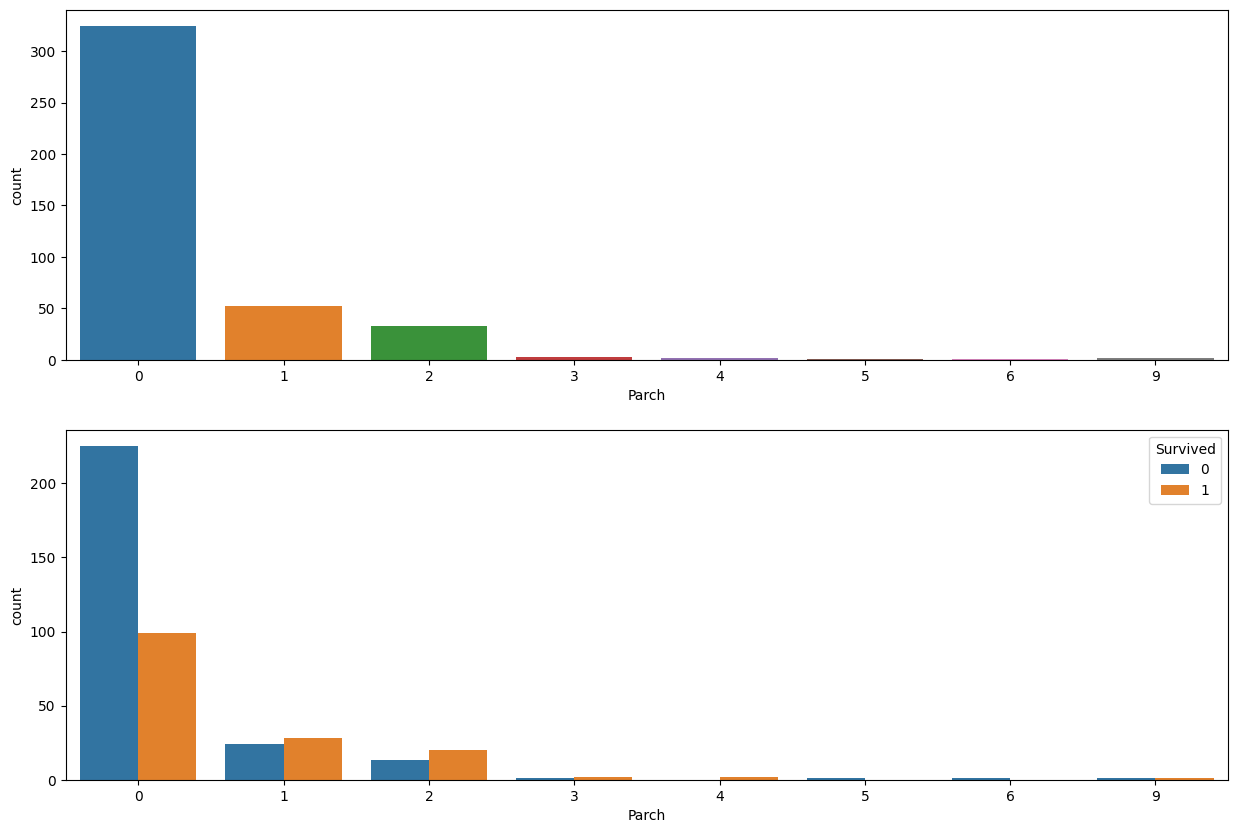

In [ ]:
plt.figure(figsize=[15,10])
plt.subplot(211)
sns.countplot(x='Parch',data=df)
plt.subplot(212)
sns.countplot(x='Parch',hue='Survived',data=df)

Most people onboard were without family and these are the people whose survival ratio is the least. People with 1/2 parents/children had a much better chance of survival.


<Axes: xlabel='Sex', ylabel='count'>

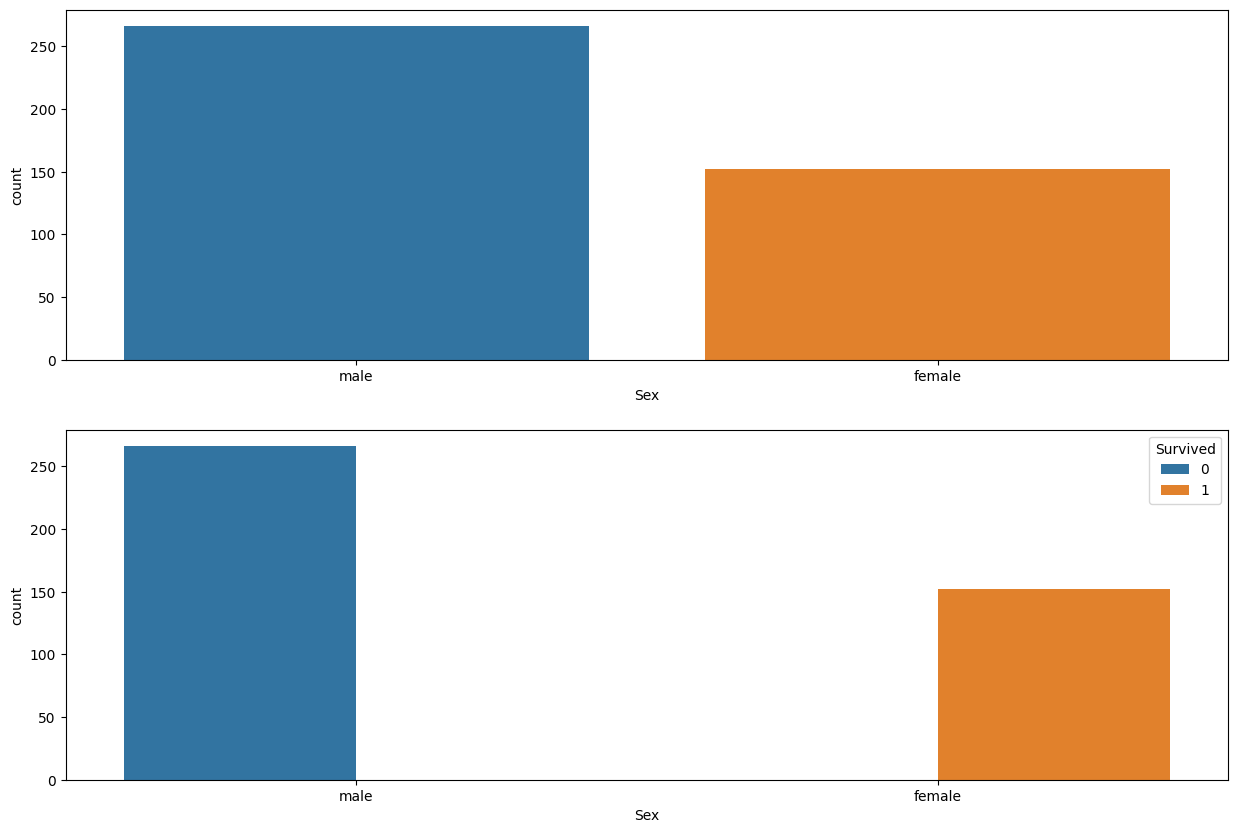

In [ ]:
plt.figure(figsize=[15,10])
plt.subplot(211)
sns.countplot(x='Sex',data=df)
plt.subplot(212)
sns.countplot(x='Sex',hue='Survived',data=df)

<Axes: >

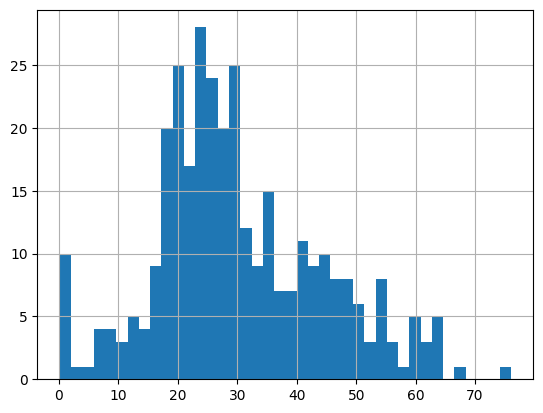

In [ ]:
df['Age'].hist(bins=40)

Majority of the passengers were in the age-group of 20-30 years.

<Axes: >

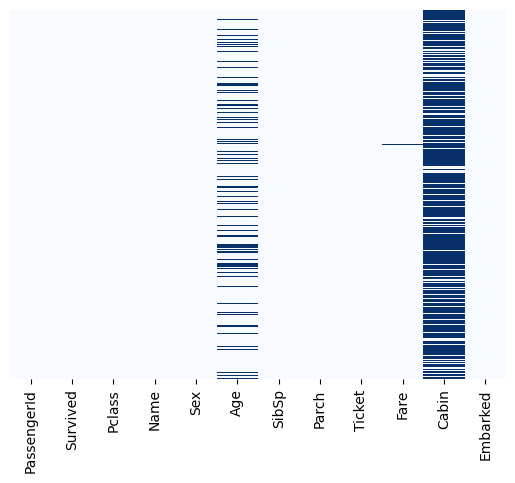

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

<Axes: >

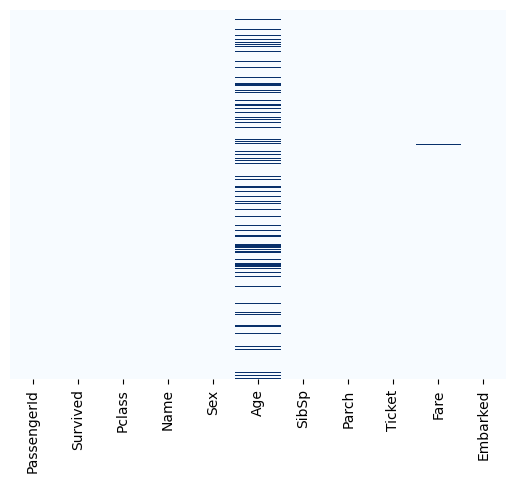

In [ ]:

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [ ]:
df['Age'].fillna(value=df['Age'].mean())

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64

<Axes: >

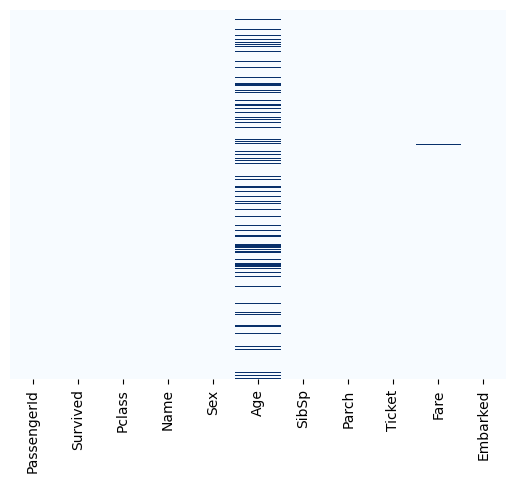

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [ ]:
#df.drop(['Name','Ticket','Embarked'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,0,3,male,34.5,0,0,7.8292
1,893,1,3,female,47.0,1,0,7.0000
2,894,0,2,male,62.0,0,0,9.6875
3,895,0,3,male,27.0,0,0,8.6625
4,896,1,3,female,22.0,1,1,12.2875


In [ ]:
def Fill_Age(data):
  age=data[0]
  sex=data[1]
  if pd.isnull(age):
    if sex=='male':
      return 29
    if sex=='female' :
      return 25

  else:
    return age


In [ ]:
df['Age']=df[['Age','Sex']].apply(Fill_Age,axis=1)

<Axes: >

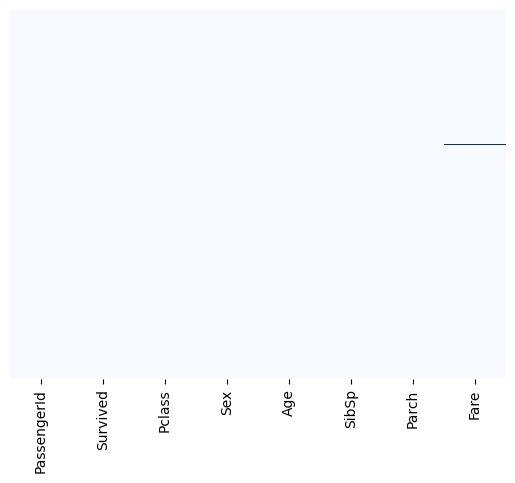

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [ ]:
male=pd.get_dummies(df['Sex'],drop_first=True)
male

,male
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [ ]:
df.drop(['Sex'],axis=1,inplace=True)

In [ ]:
df=df.T.drop_duplicates().T
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,892.0,0.0,3.0,34.5,0.0,0.0,7.8292,1.0
1,893.0,1.0,3.0,47.0,1.0,0.0,7.0000,0.0
2,894.0,0.0,2.0,62.0,0.0,0.0,9.6875,1.0
3,895.0,0.0,3.0,27.0,0.0,0.0,8.6625,1.0
4,896.0,1.0,3.0,22.0,1.0,1.0,12.2875,0.0


In [ ]:
df.dropna()


,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,892.0,0.0,3.0,34.5,0.0,0.0,7.8292,1.0
1,1,893.0,1.0,3.0,47.0,1.0,0.0,7.0000,0.0
2,2,894.0,0.0,2.0,62.0,0.0,0.0,9.6875,1.0
3,3,895.0,0.0,3.0,27.0,0.0,0.0,8.6625,1.0
4,4,896.0,1.0,3.0,22.0,1.0,1.0,12.2875,0.0
...,...,...,...,...,...,...,...,...,...
413,413,1305.0,0.0,3.0,29.0,0.0,0.0,8.0500,1.0
414,414,1306.0,1.0,1.0,39.0,0.0,0.0,108.9000,0.0
415,415,1307.0,0.0,3.0,38.5,0.0,0.0,7.2500,1.0
416,416,1308.0,0.0,3.0,29.0,0.0,0.0,8.0500,1.0


<Axes: >

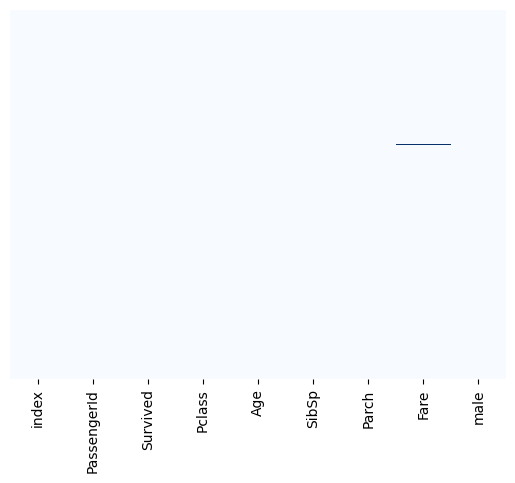

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [ ]:
df['Fare'].mode()

0    7.75
Name: Fare, dtype: float64

In [ ]:
def f(data):
  fare=data[0]

  if pd.isnull(fare):

      return 7.75


  else:
    return fare

df['Fare']=df[['Fare']].apply(f,axis=1)

X=df.drop('Survived',axis=1)
y=df['Survived']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)
predictions=log.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        71
         1.0       1.00      1.00      1.00        55

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [ ]:
print(predictions)

[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1.]


<Axes: >

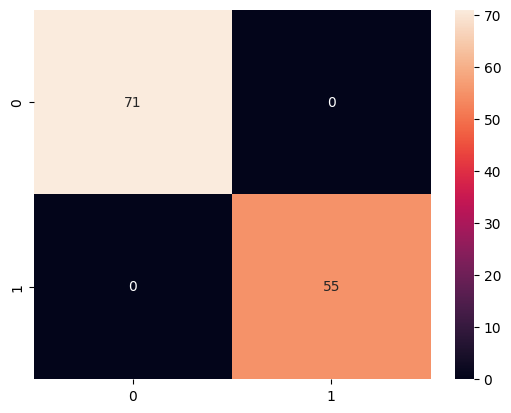

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True,fmt="d")